<h1 align='center'>Klasifikasi Digit Desimal dalam Bahasa Isyarat Menggunakan Convolutional Neural Network</h1>

### Import Modul Machine Learning Neural Network

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\EXAU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\EXAU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\EXAU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\EXAU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

### Loading gambar yang berbentuk numpy array ke variabel X dan Y

In [21]:
import numpy as np
#Data gambar tangan
X=np.load("")
#Target data
Y=np.load("Y.npy")

Target/Label merupakan target tipe one hot encoded, berupa array dengan satu nilai positif.

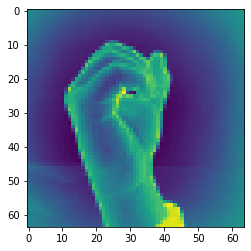

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


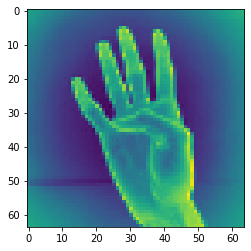

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
#Visual data
from matplotlib import pyplot as plt
plt.imshow(X[0])
plt.show()
print(Y[0])
plt.imshow(X[1000])
plt.show()
print(Y[1000])

In [23]:
#Menambah channel greyscale (...,...,...,1)
X=np.resize(X, (2062, 64,64,1))

Membagi data ke data training dan test, dengan data test 10% dari total data.

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                            
                                               test_size=0.1,
                                               random_state = 123,
                                                stratify=Y)

Menggunakan model CNN, Konvolusi gambar dua dimensi

In [25]:
model = Sequential()
model.add(layers.Conv2D((32),(3,3),activation='relu',input_shape=(64,64,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D((64),(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D((128),(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training Data

In [ ]:
model.fit(X_train, y_train, epochs=10,batch_size=25)

Didapatkan akurasi dari training adalah 98.17%

### Menyimpan model dalam bentuk h5

In [ ]:
#Menyimpan model
model.save('model_CNN_isyarat-angka.h5')

In [ ]:
#hapus pagar untuk menggunakan model yang sudah disimpan
from keras.models import load_model
#model.load('model_CNN_isyarat-angka.h5')

### Test Model

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
#Mengubah one hot encoded menjadi int64 biasa
y_test=[np.where(r==1)[0][0] for r in y_test]

In [ ]:
skor=y_pred==y_test
print("Skor prediksi model adalah {} %".format(skor.sum()/len(skor)*100))

### Evaluasi Hasil Prediksi

In [19]:
# Model evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion Matrix menunjukkan hasil prediksi dalam bentuk TP, FP, TN, FN.

In [20]:
cm

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 19]], dtype=int64)

Terlihat bahwa prediksi 1,2 dan 8 semua benar, tetapi kurang lengkap dan ada yang tidak terhitung. Sedangkan angka 4,6,7, dan 9 memiliki cakupan lengkap namun berlebih.

In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

In [17]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.97        20
           2       0.91      1.00      0.95        21
           3       0.95      0.95      0.95        21
           4       1.00      1.00      1.00        21
           5       0.95      0.95      0.95        21
           6       1.00      0.95      0.98        21
           7       1.00      0.95      0.98        21
           8       0.91      1.00      0.95        21
           9       1.00      0.95      0.97        20

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
Data=load_breast_cancer()

In [4]:
n_samples, n_features = Data.data.shape
print('Banyak data:', n_samples)
print('Banyak fitur:', n_features)

Banyak data: 569
Banyak fitur: 30


In [5]:
tabel=pd.DataFrame(Data.data,columns=Data.feature_names)
tabel

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


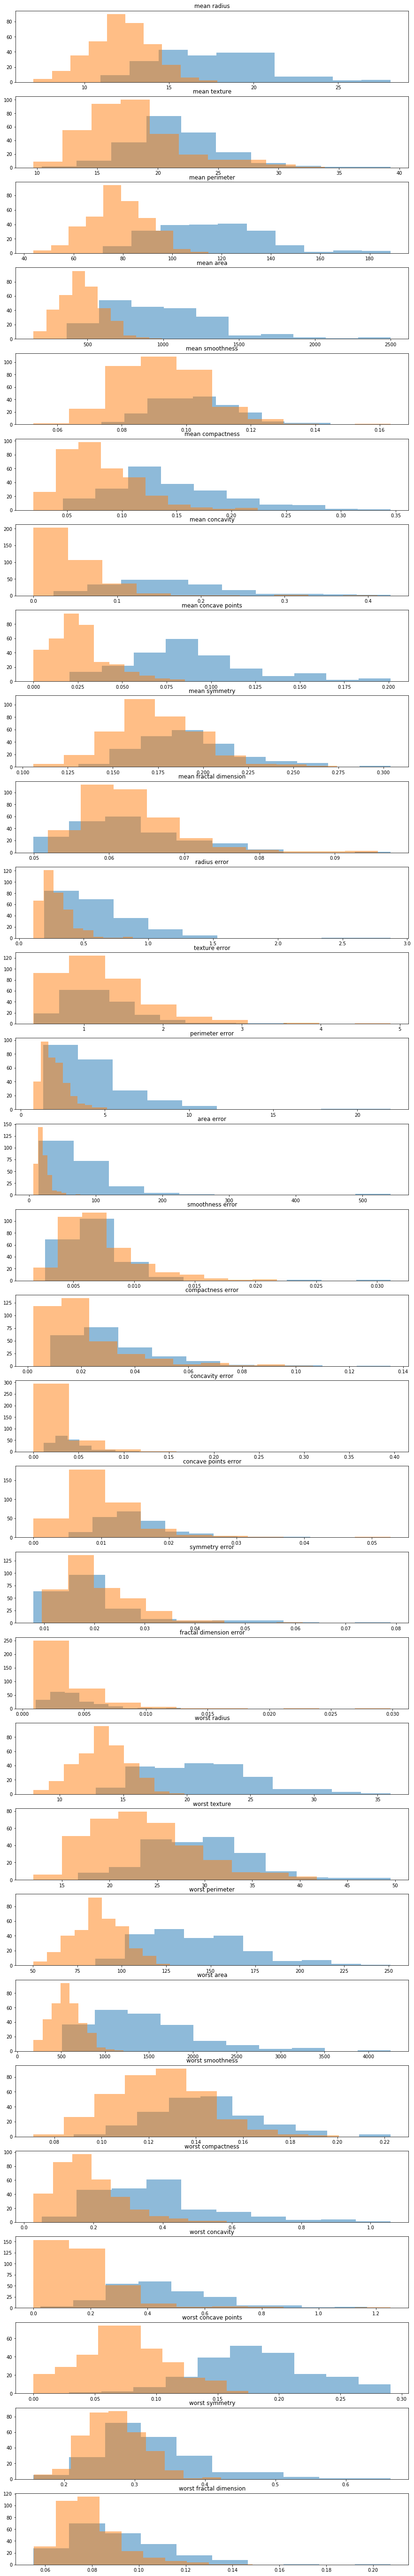

In [6]:
fig,ax=plt.subplots(30,figsize=(15,100))
for j in range(0,30):
    for label in range(len(Data.target_names)):
        ax[j].set_title(Data.feature_names[j])
        ax[j].hist(Data.data[Data.target==label, j], 
        label=Data.target_names[label],
        alpha=0.5)

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(Data.data, Data.target, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=Data.target)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

In [9]:
print("Akurasi:",np.sum(pred_y == test_y) / float(len(test_y))*100,'%')

Akurasi: 93.33333333333333 %


In [10]:
print('Sampel yang di prediksi dengan benar:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

Sampel yang di prediksi dengan benar:
[  0   2   3   4   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  34  35  36  37  38  40  41
  42  43  44  45  46  47  49  50  51  52  53  55  56  57  58  59  61  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 217 218 219 220 221 222 224 225 226 227 228 229 230 231
 232 233 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 

In [11]:
print('Sampel yang salah diprediksi:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Sampel yang salah diprediksi:
[  1   5  17  22  30  39  48  54  60  62  78 159 177 199 216 223 234 260
 266]
